In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

TrumpTweets = pd.read_csv("realDonaldTrump.csv")
TrumpTweets.head()

,created_at,text,url,replies,retweets,favorites,user
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump
3,10/22/17 12:08,It is finally sinking through. 46% OF PEOPLE B...,https://twitter.com/realDonaldTrump/status/922...,56238,25102,112890,realDonaldTrump
4,10/22/17 12:02,Wacky Congresswoman Wilson is the gift that ke...,https://twitter.com/realDonaldTrump/status/922...,32136,21573,97145,realDonaldTrump


In [14]:
TrumpTweets['About Clinton'] = TrumpTweets['text'].str.contains("Clinton")
Tweets_about_Clinton = TrumpTweets[TrumpTweets['About Clinton']]

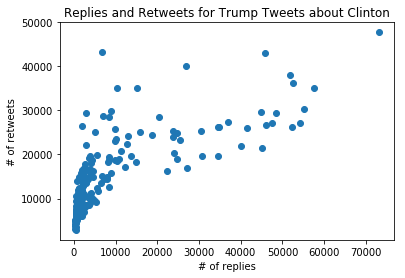

In [21]:
plt.scatter(Tweets_about_Clinton['replies'], Tweets_about_Clinton['retweets'])
plt.title("Replies and Retweets for Trump Tweets about Clinton")
plt.xlabel("# of replies")
plt.ylabel("# of retweets")
plt.show()

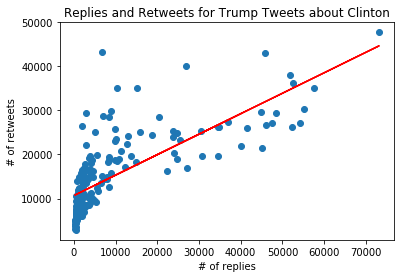

R squared: 0.5675625040756124


In [38]:
import scipy.stats as stats
#fits linear regression for Retweets and Replies
slope, intercept, r_value, p_value, std_err = stats.linregress(Tweets_about_Clinton['replies'], Tweets_about_Clinton['retweets'])

#creates scatter plot of retweets and replies and draws line of best fit
plt.scatter(Tweets_about_Clinton['replies'], Tweets_about_Clinton['retweets'])
plt.title("Replies and Retweets for Trump Tweets about Clinton")
plt.xlabel("# of replies")
plt.ylabel("# of retweets")
plt.plot(Tweets_about_Clinton['replies'], slope * Tweets_about_Clinton['replies'] + intercept, color = 'r')
plt.show()
print "R squared:", r_value ** 2

In [27]:
Tweets_not_about_Clinton = TrumpTweets[TrumpTweets['About Clinton'] == False]


,created_at,text,url,replies,retweets,favorites,user,About Clinton
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump,False
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump,False
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump,False
3,10/22/17 12:08,It is finally sinking through. 46% OF PEOPLE B...,https://twitter.com/realDonaldTrump/status/922...,56238,25102,112890,realDonaldTrump,False
4,10/22/17 12:02,Wacky Congresswoman Wilson is the gift that ke...,https://twitter.com/realDonaldTrump/status/922...,32136,21573,97145,realDonaldTrump,False


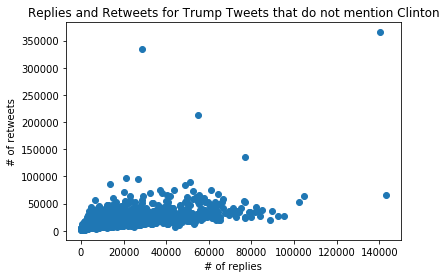

In [28]:
plt.scatter(Tweets_not_about_Clinton['replies'], Tweets_not_about_Clinton['retweets'])
plt.title("Replies and Retweets for Trump Tweets that do not mention Clinton")
plt.xlabel("# of replies")
plt.ylabel("# of retweets")
plt.show()

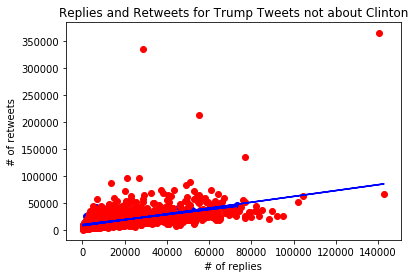

In [40]:
#creates scatter plot of retweets and replies and draws line of best fit for Clinton Tweets
plt.scatter(Tweets_about_Clinton['replies'], Tweets_about_Clinton['retweets'], color = 'blue')
plt.title("Replies and Retweets for Trump Tweets about Clinton")
plt.xlabel("# of replies")
plt.ylabel("# of retweets")
plt.plot(Tweets_about_Clinton['replies'], slope * Tweets_about_Clinton['replies'] + intercept, color = 'b')

#creates line of best fit for non clinton tweets
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(Tweets_not_about_Clinton['replies'], Tweets_not_about_Clinton['retweets'])
plt.scatter(Tweets_not_about_Clinton['replies'], Tweets_not_about_Clinton['retweets'], color = 'r')
plt.title("Replies and Retweets for Trump Tweets not about Clinton")
plt.xlabel("# of replies")
plt.ylabel("# of retweets")
plt.plot(Tweets_not_about_Clinton['replies'], slope_2 * Tweets_not_about_Clinton['replies'] + intercept_2, color = 'b')
plt.show()


count      3232.000000
mean      16315.450186
std       13963.667385
min        1525.000000
25%        8970.250000
50%       13598.000000
75%       19804.500000
max      365461.000000
Name: retweets, dtype: float64


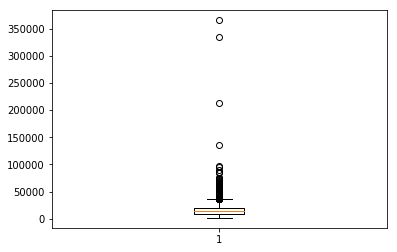

In [52]:
print TrumpTweets.retweets.describe()
plt.boxplot(TrumpTweets.retweets)
plt.show()

In [57]:
np.mean(TrumpTweets.retweets > 20000)

0.24628712871287128

In [70]:
TrumpTweets['Popular'] = TrumpTweets['retweets'] > TrumpTweets['retweets'].mean()

## Building a Naive Bayes Classifier

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#creates a matrix with counts of each for for each tweet
Vectorizer = CountVectorizer(decode_error = 'replace')
counts = Vectorizer.fit_transform(TrumpTweets['text'].values)
targets = TrumpTweets['Popular']

#splits data into train and test set
counts_train, counts_test, targets_train, targets_test = train_test_split(counts, targets, test_size = .1)

clf = MultinomialNB()
clf.fit(counts_train, targets_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
print clf.score(counts_test, targets_test)

0.7006172839506173


In [73]:
from sklearn.metrics import recall_score, precision_score
predictions = clf.predict(counts_test)
print recall_score(targets_test, predictions)
print precision_score(targets_test, predictions)

0.7131782945736435
0.6052631578947368


In [40]:
print TrumpTweets.text.values[3]
print clf.predict(Vectorizer.transform(TrumpTweets.text.values[0:1]))
print TrumpTweets.retweets.values[3]

It is finally sinking through. 46% OF PEOPLE BELIEVE MAJOR NATIONAL NEWS ORGS FABRICATE STORIES ABOUT ME. FAKE NEWS, even worse! Lost cred.
[10243]
25102


In [76]:
examples = ['Crooked Hilary Sad', 'Fake News CNN', "Little Rocket Man", "NFL Anthem", "Wall illegal immigration", "thanked white house christmas"]
example_counts = Vectorizer.transform(examples)
clf.predict(example_counts)

array([ True,  True,  True,  True,  True,  True])